In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv("crop_yield_dataset.csv")

ds["Date"] = pd.to_datetime(ds["Date"])
ds["Year"] = ds["Date"].dt.year
ds["Month"] = ds["Date"].dt.month

os.makedirs("plots", exist_ok=True)

print(ds.head())
print(ds.info())
print(ds.describe())


        Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  Wind_Speed  \
0 2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   10.956707   
1 2014-01-01      Corn     Loamy     6.50    20.052576  79.947424    8.591577   
2 2014-01-01      Rice     Peaty     5.50    12.143099  80.000000    7.227751   
3 2014-01-01    Barley     Sandy     6.75    19.751848  80.000000    2.682683   
4 2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000    7.696070   

      N     P     K  Crop_Yield  Soil_Quality  Year  Month  
0  60.5  45.0  31.5    0.000000     22.833333  2014      1  
1  84.0  66.0  50.0  104.871310     66.666667  2014      1  
2  71.5  54.0  38.5    0.000000     27.333333  2014      1  
3  50.0  40.0  30.0   58.939796     35.000000  2014      1  
4  49.5  45.0  38.5   32.970413     22.166667  2014      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dty

1. LINE PLOT (Crop Yield Over Time (Tomato))


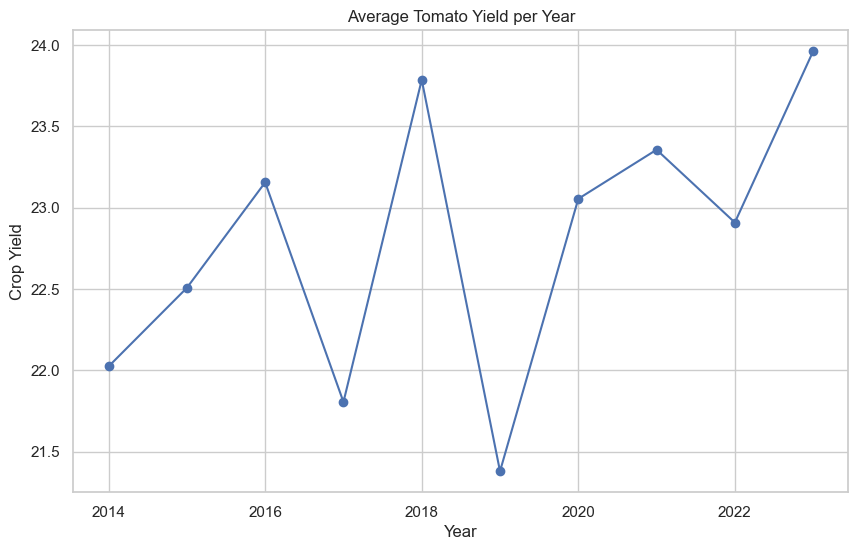

2. SCATTER PLOT (relationship between two variables)


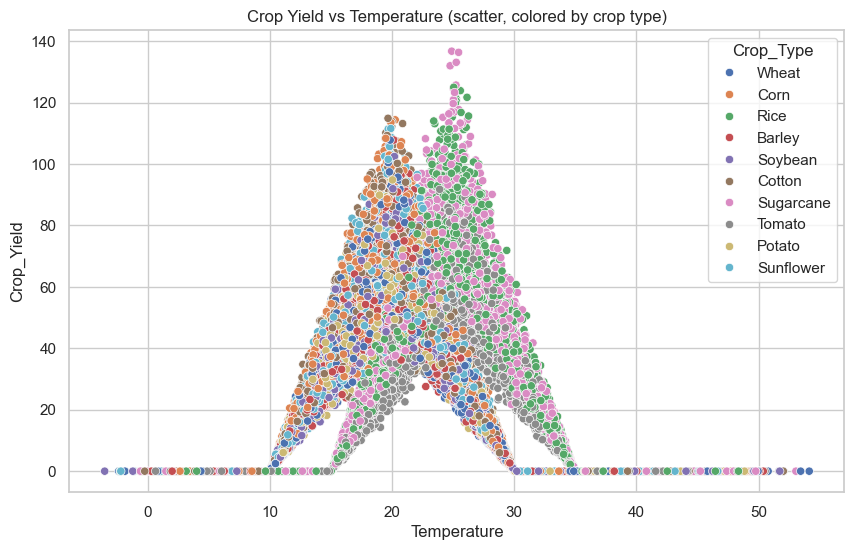

3. HISTOGRAM / DISTRIBUTION


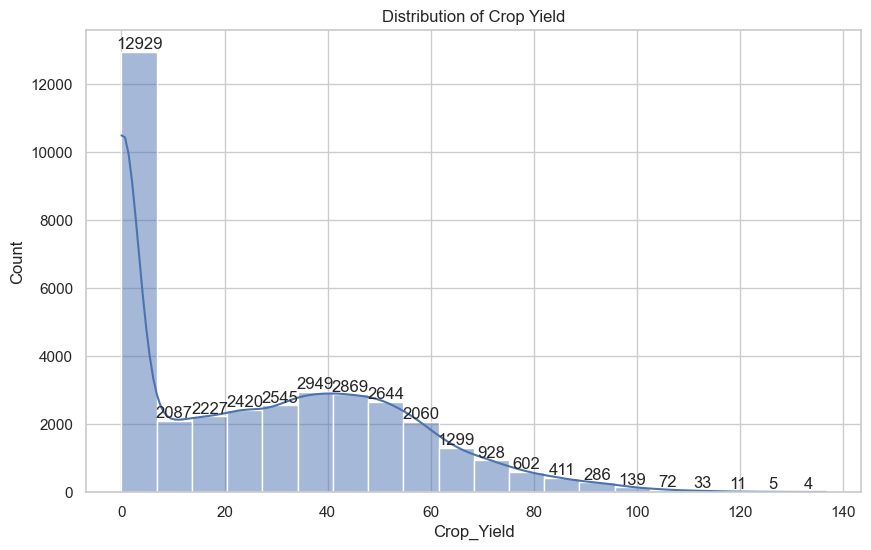

4. BOX PLOT (spread + outliers by category)


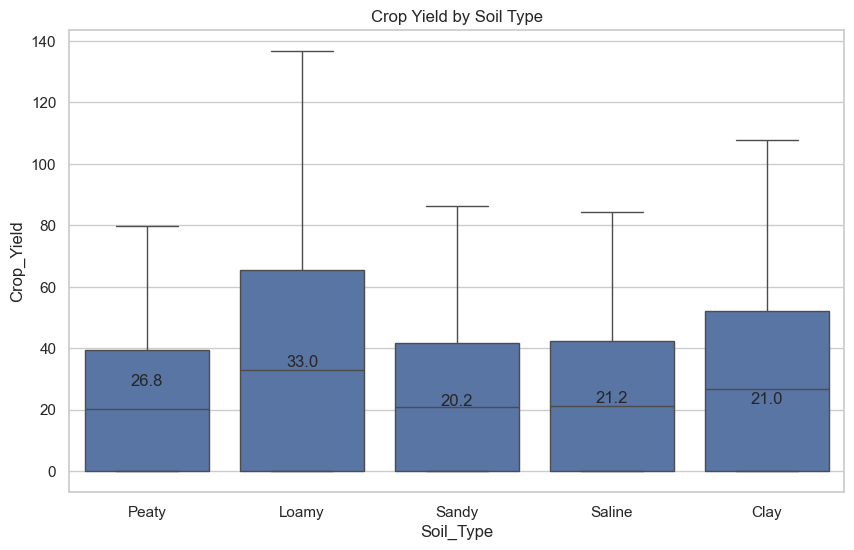

5. BAR PLOT (average values across categories)


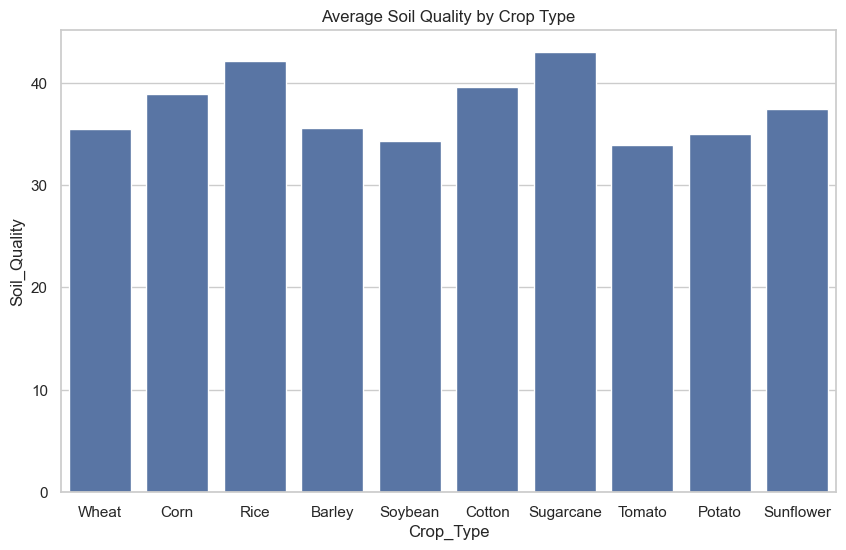

6. HEATMAP (correlation matrix)


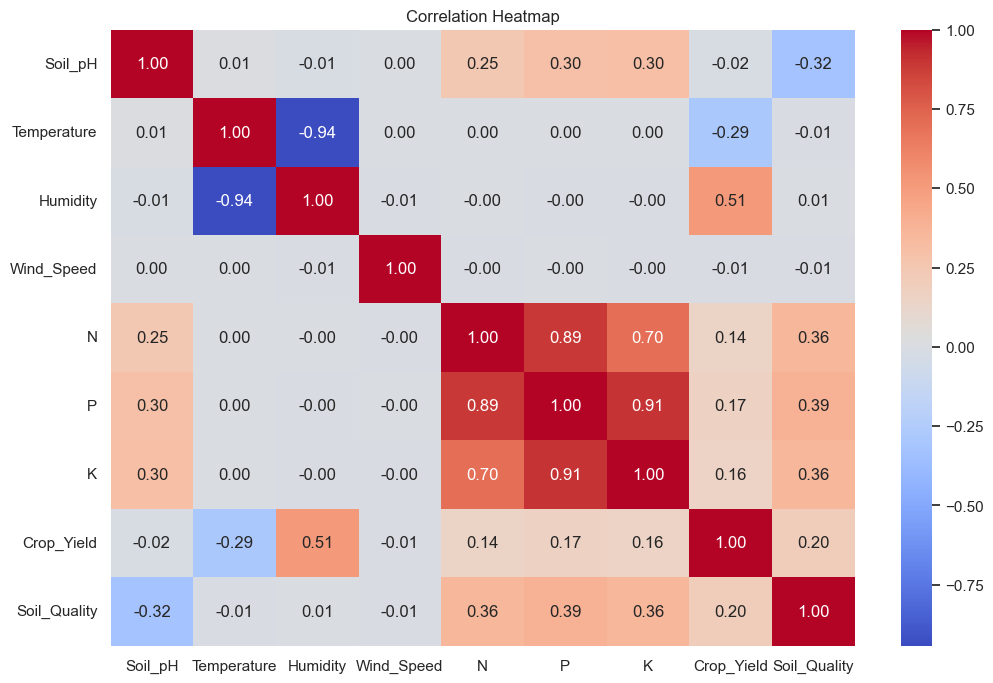

7. PAIRPLOT (scatterplots for all numeric relationships)


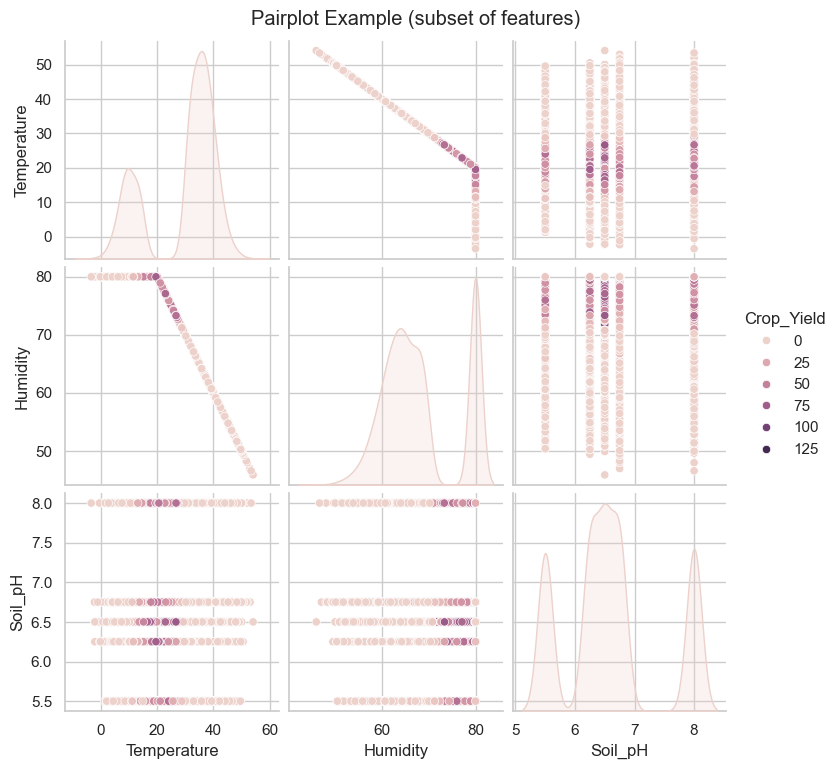

In [ ]:

# Set a nice style
sns.set_theme(style="whitegrid")

# Make all plots bigger by default
plt.rcParams["figure.figsize"] = (10, 6)

print("1. LINE PLOT (Crop Yield Over Time (Tomato))")
tomato_ds = ds[ds["Crop_Type"] == "Tomato"]

# Group by year
tomato_trend = tomato_ds.groupby(tomato_ds["Date"].dt.year)["Crop_Yield"].mean()

plt.figure(figsize=(10,6))
plt.plot(tomato_trend.index, tomato_trend.values, marker="o")

# Add annotations for each point
for x, y in zip(tomato_trend.index, tomato_trend.values):
    plt.text(x, y, f"{y:.1f}", ha="center", va="bottom", fontsize=9)

plt.title("Average Tomato Yield per Year")
plt.xlabel("Year")
plt.ylabel("Crop Yield")
plt.grid(True)
plt.savefig("plots/lineplot_yield_over_time_tomato.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("2. SCATTER PLOT (relationship between two variables)")
plt.figure()
sns.scatterplot(x="Temperature", y="Crop_Yield", hue="Crop_Type", data=ds)
plt.title("Crop Yield vs Temperature (scatter, colored by crop type)")
plt.savefig("plots/scatter_yield_vs_temperature.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("3. HISTOGRAM / DISTRIBUTION")
plt.figure()
ax = sns.histplot(ds["Crop_Yield"], bins=20, kde=True)

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height, int(height),
            ha="center", va="bottom")

plt.title("Distribution of Crop Yield")
plt.savefig("plots/hist_Crop_Yield.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("4. BOX PLOT (spread + outliers by category)")
plt.figure()
ax = sns.boxplot(x="Soil_Type", y="Crop_Yield", data=ds)

# Annotate medians
medians = ds.groupby("Soil_Type")["Crop_Yield"].median()
for i, median in enumerate(medians):
    ax.text(i, median, f"{median:.1f}", ha="center", va="bottom")

plt.title("Crop Yield by Soil Type")
plt.savefig("plots/boxplot_yield_by_soiltype.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("5. BAR PLOT (average values across categories)")
plt.figure()
sns.barplot(x="Crop_Type", y="Soil_Quality", data=ds, errorbar=None)
plt.title("Average Soil Quality by Crop Type")
plt.savefig("plots/barplot_soilquality_by_crop.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("6. HEATMAP (correlation matrix)")
plt.figure(figsize=(12, 8))
corr = ds[["Soil_pH", "Temperature", "Humidity", "Wind_Speed", "N", "P", "K", "Crop_Yield", "Soil_Quality"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("plots/heatmap_correlations.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("7. PAIRPLOT (scatterplots for all numeric relationships)")
pair = sns.pairplot(ds[["Temperature", "Humidity", "Soil_pH", "Crop_Yield"]], hue="Crop_Yield")
pair.fig.suptitle("Pairplot Example (subset of features)", y=1.02)
pair.savefig("plots/pairplot_features.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


In [ ]:
ds.describe()
ds.isnull().sum()

ds.corr(numeric_only=True)["Crop_Yield"].sort_values(ascending=False)

ds.groupby("Date")["Crop_Yield"].mean().plot(kind="line", marker="o")
plt.figure()
sns.lineplot(x="Date", y="Crop_Yield", data=ds)
plt.show()

ds.groupby("Crop_Type")["Crop_Yield"].mean().sort_values()
plt.figure()
sns.scatterplot(x="Crop_Type", y="Crop_Yield", hue="Crop_Type", data=ds)
plt.show()

ds.groupby("Soil_Type")["Crop_Yield"].mean().sort_values()
plt.figure()
sns.scatterplot(x="Soil_Type", y="Crop_Yield", hue="Crop_Type", data=ds)
plt.show()

ds.groupby("Soil_Quality")["Crop_Yield"].mean().sort_values()
plt.figure()
sns.scatterplot(x="Soil_Quality", y="Crop_Yield", hue="Crop_Type", data=ds)

